In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [33]:
def ell2bin (ell,ell_min, ell_max, Nbins):
    spc = np.log((ell_max+1)/ell_min)/Nbins
    return np.floor((np.log(ell/ell_min)/spc)).astype(int)

In [34]:
def count_triangles (Nbins, ell_min=20, ell_max=2000):
    Nt=0
    Noff = 5
    counts=np.zeros(Noff)
    print ("NBins:", ell2bin(ell_max,ell_min,ell_max,Nbins)-ell2bin(ell_min,ell_min, ell_max,Nbins)+1)
    for l1 in tqdm(np.arange(ell_min,ell_max)):
        l1bin = ell2bin(l1,ell_min, ell_max, Nbins)
        for l2 in np.arange(l1,ell_max):
            l2bin = ell2bin(l2,ell_min, ell_max, Nbins)
            # we avoid double counting the triangle configurations by insisting l1<=l2<=l3
            l3ar=np.arange(l2,min(l1+l2,ell_max))
            Nt+=len(l3ar)
            l3bins = ell2bin(l3ar,ell_min, ell_max, Nbins)
            mindiff = np.minimum(l2bin-l1bin,l3bins-l2bin)
            for i in range(Noff):
                counts[i]+=np.sum(mindiff<=i)
    return counts/Nt

In [40]:
nbins = [30,20,10, 5]
res = [count_triangles(s,ell_max=2000) for s in nbins]

NBins: 30


  0%|          | 0/1980 [00:00<?, ?it/s]

NBins: 20


  0%|          | 0/1980 [00:00<?, ?it/s]

NBins: 10


  0%|          | 0/1980 [00:00<?, ?it/s]

NBins: 5


  0%|          | 0/1980 [00:00<?, ?it/s]

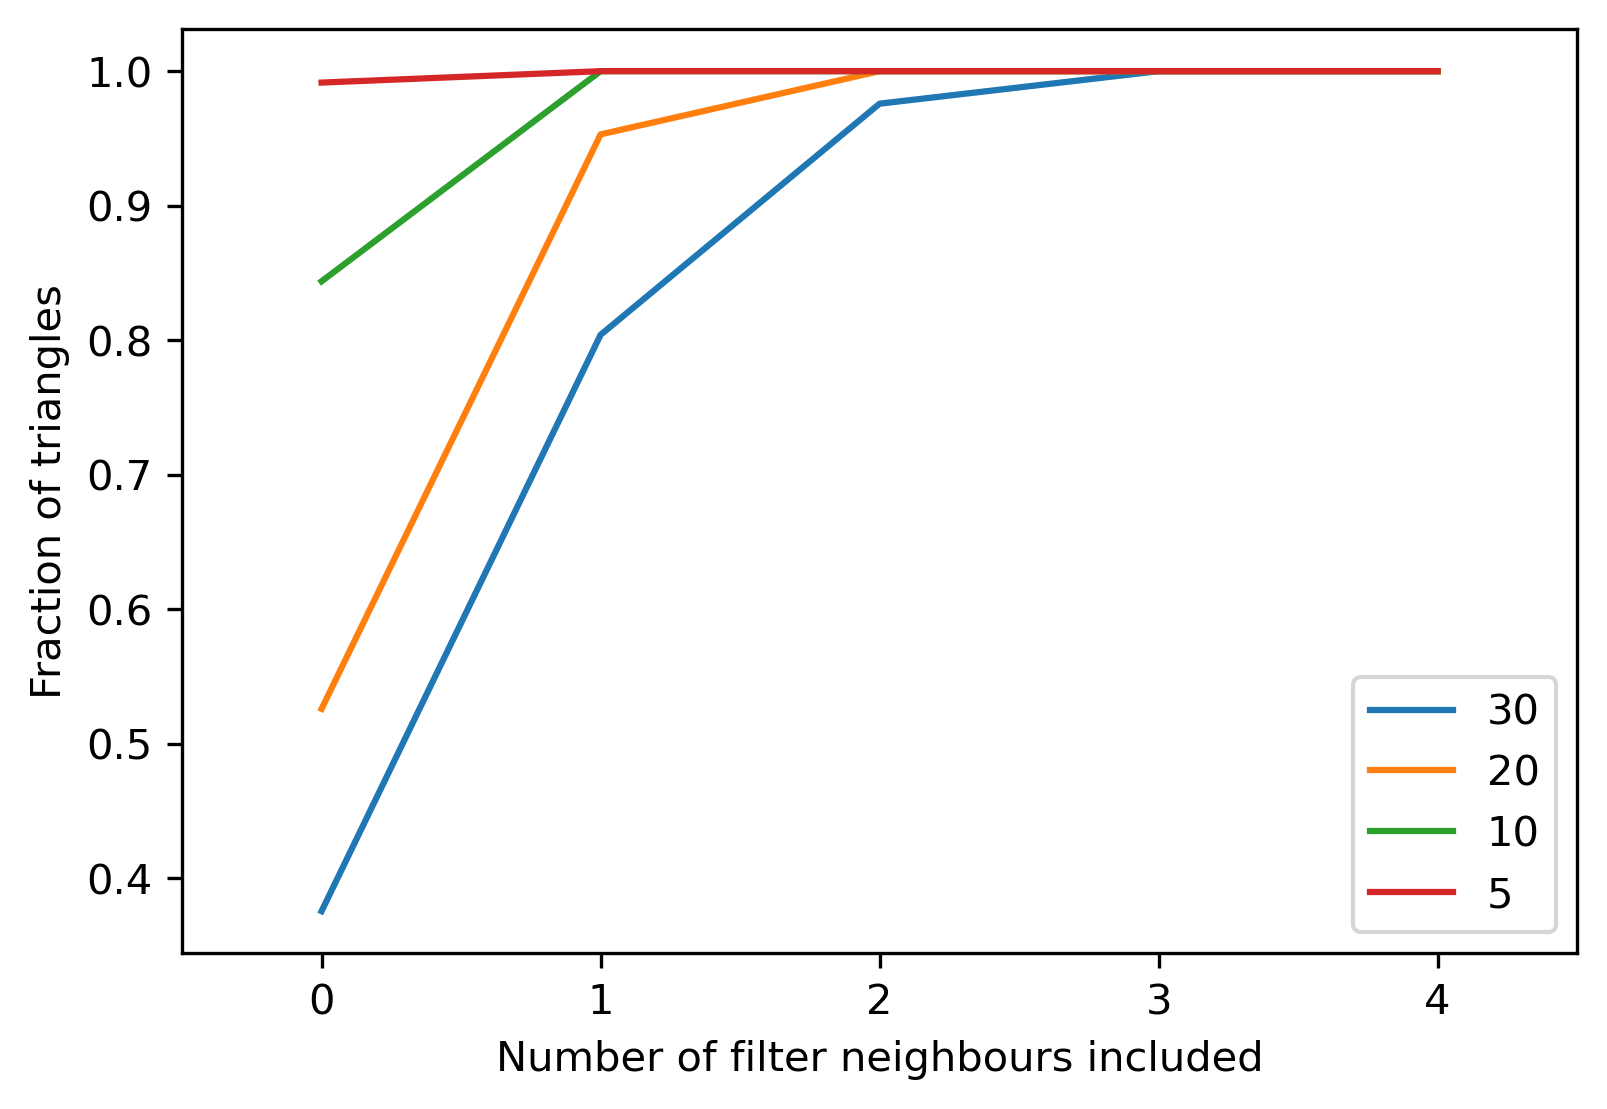

In [41]:
res = np.array(res)
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
for n,ar in zip(nbins,res):
    ax.plot(ar,label=n)
ax.legend()
ax.set_xlabel("Number of filter neighbours included")
ax.set_ylabel("Fraction of triangles")
ax.set_xlim(-0.5,4.5)
fig.savefig("/home/anze/isocell.pdf")

In [39]:
nbins

2.0